# Hierarchical Clustering.
<p>Prepared by: <a href = 'https://github.com/sagsshakya'>Sagun Shakya</a></p>
- GITAM Institute of Science.

<img src = 'Clustering.jpg'>

## Algorithm.
 - Agglomorative.

<img src = 'agg.jpg'>

## Dendrograms.

<img src = 'dendrogram1.jpg'>

### Importing the libraries.
### Getting the dataset.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir(r'C:\Users\acer\Desktop\P14-Machine-Learning-AZ-Template-Folder\Machine Learning A-Z Template Folder\Part 4 - Clustering\Section 24 - K-Means Clustering\P14-K-Means\K_Means')
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.columns.values

array(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'], dtype=object)

In [3]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.shape

(200, 5)

## Labelling the age groups for visualization.

In [6]:
def ageCoder(myage):
    if myage>=18 and myage<=30:
        return "Youth"
    elif myage>30 and myage<=60:
        return "Working"
    elif myage>60:
        return "Senior"

<p>
<b>Syntax</b>:

s.apply(func, convert_dtype=True, args=())

<b>Parameters</b>:
<br>
func: .apply takes a function and applies it to all values of pandas series.
<br>
convert_dtype: Convert dtype as per the function’s operation.
<br>
args=(): Additional arguments to pass to function instead of series.
<br><br>
<b>Return Type</b>: Pandas Series after applied function/operation.
</p>

In [8]:
df['AgeClass'] = df['Age'].apply(ageCoder,convert_dtype = True)
df.head(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeClass
0,1,Male,19,15,39,Youth
1,2,Male,21,15,81,Youth
2,3,Female,20,16,6,Youth


<hr>

## Labelling Annual Income for visualization.

In [12]:
income = df['Annual Income (k$)'].values
range = income.max() - income.min()
lim1 = income.min() + (1/3)*range
lim2 = income.max() - (1/3)*range

print(income.min(), round(lim1), round(lim2), income.max())

15 56.0 96.0 137


In [13]:
def incomeCoder(salary):
    if salary<= lim1:
        return 'low'
    elif salary>lim1 and salary<=lim2:
        return 'medium'
    elif salary>lim2:
        return 'high'

df['IncomeClass'] = df['Annual Income (k$)'].apply(incomeCoder, convert_dtype = 1)
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),AgeClass,IncomeClass
0,1,Male,19,15,39,Youth,low
1,2,Male,21,15,81,Youth,low


<hr>

### Data Visualization.

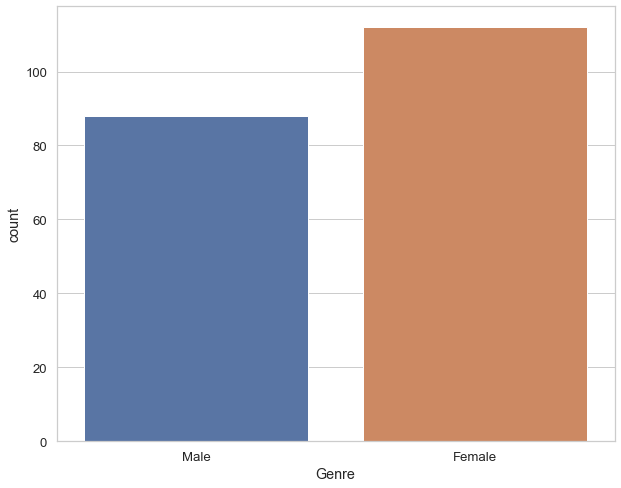

In [14]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.countplot(df.Genre)
plt.show()

##### More number of girls than boys.

In [16]:
df.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

<hr>

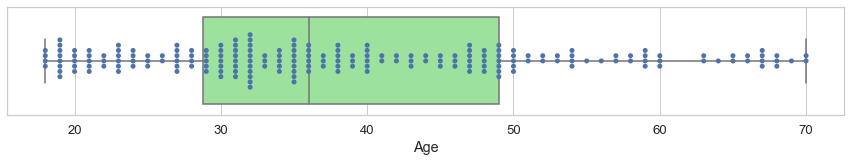

In [17]:
plt.figure(figsize = (15,2))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.swarmplot(df.Age)
sns.boxplot(df.Age, color = 'lightgreen')

plt.show()

<hr>

In [18]:
pd.crosstab(df.Genre, df.AgeClass, margins = True)

AgeClass,Senior,Working,Youth,All
Genre,,,,
Female,6,72,34,112
Male,11,49,28,88
All,17,121,62,200


In [19]:
pd.crosstab(df.Genre, df.AgeClass, margins = True, normalize = 'index').round(3) * 100

AgeClass,Senior,Working,Youth
Genre,,,
Female,5.4,64.3,30.4
Male,12.5,55.7,31.8
All,8.5,60.5,31.0


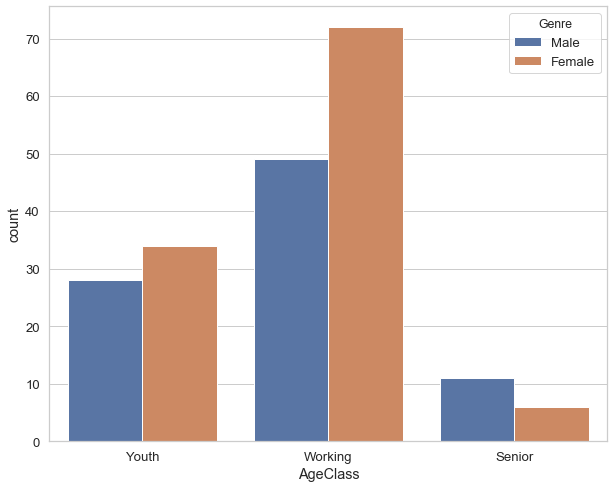

In [20]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.countplot(df.AgeClass, hue = df.Genre)
plt.show()

##### More number of working class females.
##### Minimum number of senior women.

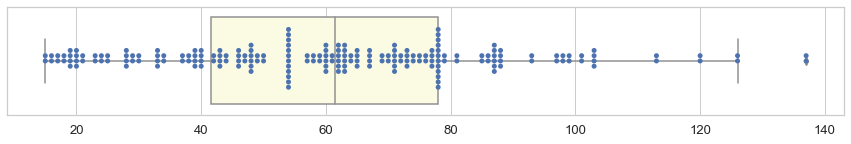

In [21]:
income = df.iloc[:,3].values
plt.figure(figsize = (15,2))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.swarmplot(income)
sns.boxplot(income, color = 'lightyellow')

plt.show()

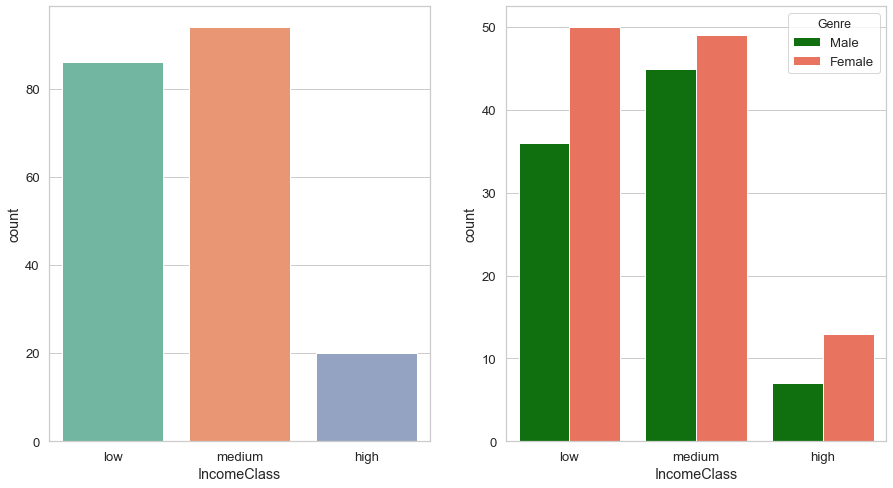

In [22]:
plt.figure(figsize = (15,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 

plt.subplot(1,2,1)
sns.countplot(df.IncomeClass, palette = 'Set2')
plt.subplot(1,2,2)
sns.countplot(df.IncomeClass, hue = df.Genre, palette = ['green', 'tomato'])
plt.show()

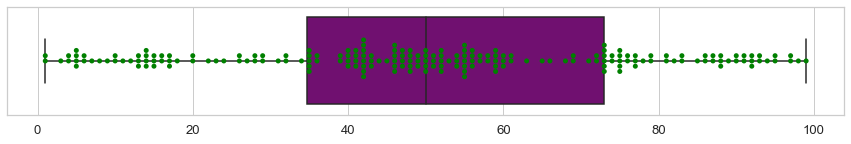

In [23]:
spend = df.iloc[:,4].values
plt.figure(figsize = (15,2))
sns.set(style = 'whitegrid', font_scale = 1.2) 

sns.swarmplot(spend, color = 'green')
sns.boxplot(spend, color = 'purple')

plt.show()

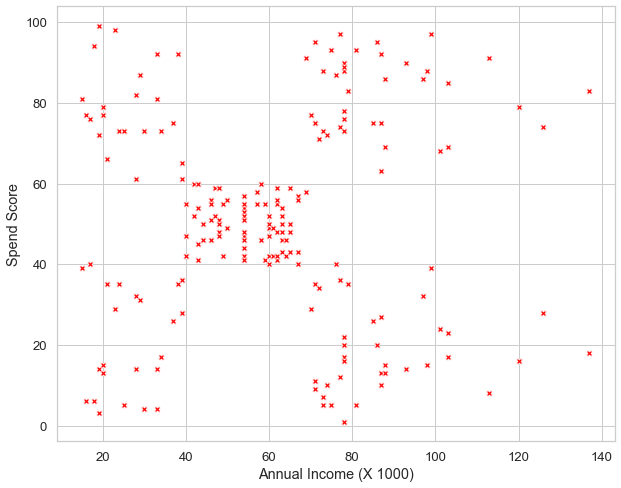

In [24]:
plt.figure(figsize = (10,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 
sns.scatterplot(x = income, y = spend, marker = 'X', color = 'red')
plt.xlabel('Annual Income (X 1000)')
plt.ylabel('Spend Score')
plt.show()

<hr>

## Setting up variables.

In [25]:
X = df.iloc[:, [3,4]].values

In [26]:
import scipy.cluster.hierarchy as sch

### Using the dendrogram to find the optimal number of clusters.

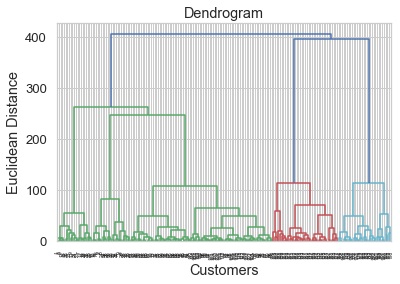

In [31]:
dendogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
 

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

##### Looking at the graph, the optimal numbr of clusters is given by the rightmost blue line. (n_clusters = 5)
- The longest vertical line that can be drawn without crossing any horizontal line.

### Fitting hierarchical clustering to the mall dataset.
<a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html'>documentation</a>

In [32]:
from sklearn.cluster import AgglomerativeClustering as AC
'''
# class sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity='euclidean',
memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)

- Recursively merges the pair of clusters that minimally increases a given linkage distance.
'''
hc = AC(n_clusters = 5)

### Making Predictions.

In [43]:
y_hc = hc.fit_predict(X)
print(y_hc)
print('\n')
print(set(y_hc))

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


{0, 1, 2, 3, 4}


## Visualising the clusters.

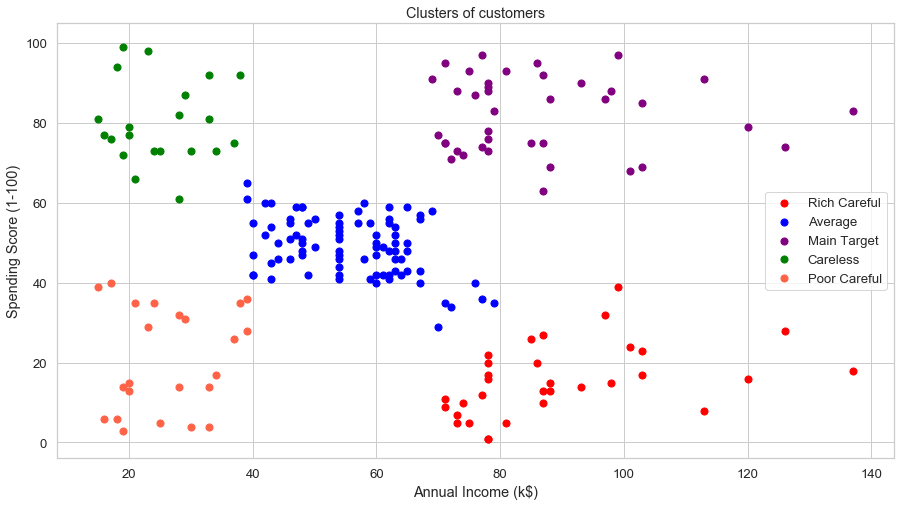

In [47]:
plt.figure(figsize = (15,8))
sns.set(style = 'whitegrid', font_scale = 1.2) 
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Rich Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Average')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'purple', label = 'Main Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'green', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'tomato', label = 'Poor Careful')
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'green', marker = 'X', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# The End.